In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we can see there is two null value present in training dataset. one null value in Route feature & one null value with Total_stops feature.

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.shape

(10682, 11)

In [7]:
train_data.drop_duplicates(keep='first',inplace=True)

In [8]:
train_data.shape

(10462, 11)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


As we can see all features are object data type so we have to treat all object data to integer as our machine don't understand object data type.

In [10]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In our test dataset there is no null value present.

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


We can see in test_dataset all features are object data type.

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [15]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
test_data['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [17]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [18]:
test_data['Source'].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

As we can see Route variable represnts the path of journey. And Total stop variable capture the information of flight is direct or connecting so we deside to drop Route variable.

In [19]:
train_data.drop('Route',axis=1,inplace=True)
test_data.drop('Route',axis=1,inplace=True)

Now we can see data visualization to check data relationship between features and target.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

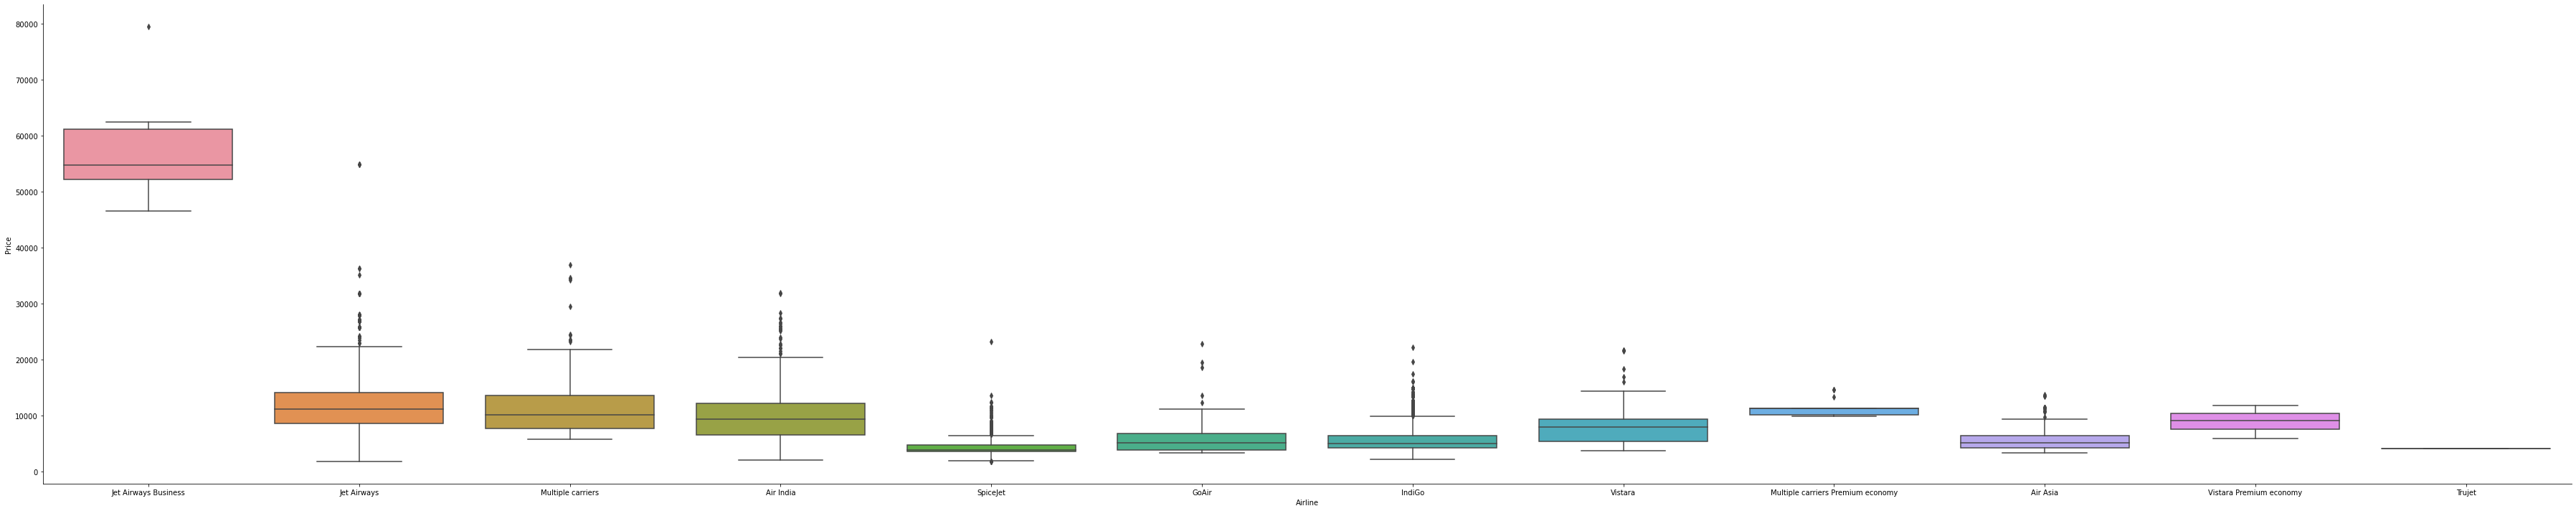

In [21]:
sns.catplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False),kind='box',height=10, aspect=5)
plt.show()

As we can see the name of Airline matters. Jet Airways Business has highestprice range and other airlines price ranges is alo varies.

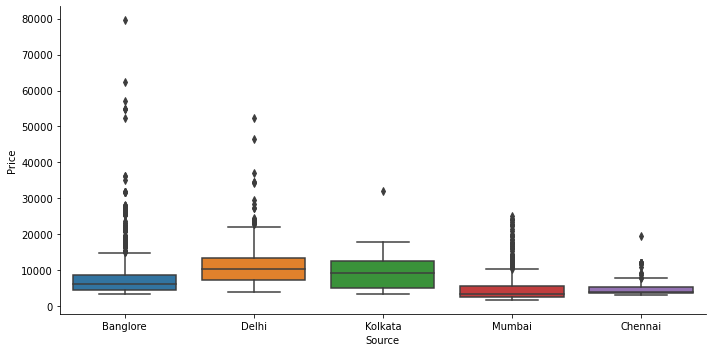

In [22]:
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='box',height=5,aspect=2)
plt.show()

AS we can see Banglore has more outliers and chennai has least outliers.

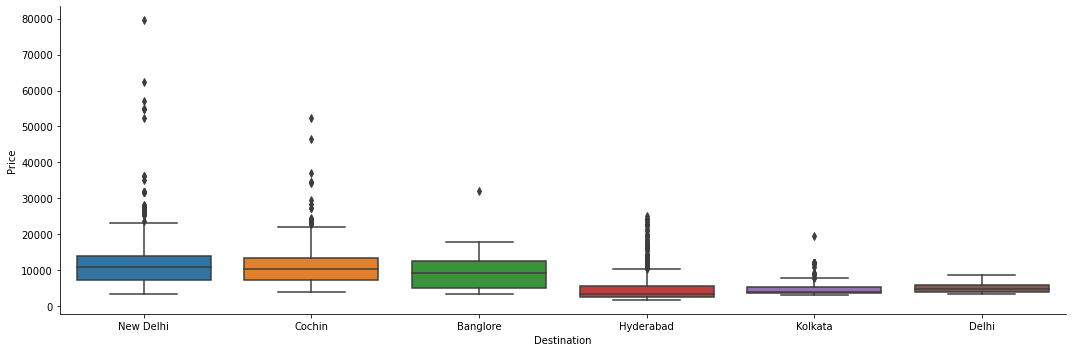

In [23]:
sns.catplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False),kind='box',height=5,aspect=3)
plt.show()

In [24]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


As we can see all feature variables are object data type so now we have preprocess all the data & convert into integers.

# Dealing with Categorical data & numerical data

Organising Date_of_Journey for better processing of data.

In [25]:
train_data['Journey_day']=train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data['Journey_month']=train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)


In [26]:
test_data['Journey_day']=test_data['Date_of_Journey'].str.split('/').str[0].astype(int)
test_data['Journey_month']= test_data['Date_of_Journey'].str.split('/').str[1].astype(int)
test_data.drop('Date_of_Journey',axis=1,inplace=True)

Here we are going to convert Duration to Hours in Minutes

In [27]:
train_data['Duration']=train_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']= test_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In Dep_Time we will into convert hour and minutes. 

In [28]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_minute']=pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time',axis=1,inplace=True)

In [29]:
test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute']=pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time',axis=1,inplace=True)

same we will convert Arrival_Time into Hours and Minutes

In [30]:
train_data['Arr_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arr_minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time',axis=1,inplace=True)

In [31]:
test_data['Arr_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arr_minute']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time',axis=1,inplace=True)

Now dealing with categorical data & numerical data

In [32]:
train_categorical_data=train_data.select_dtypes(exclude=['int64','float','int32'])
train_numerical_data=train_data.select_dtypes(include=['int64','float','int32'])

test_categorical_data=test_data.select_dtypes(exclude=['int64','float','int32'])
test_numerical_data=test_data.select_dtypes(include=['int64','float','int32'])

train_categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
train_categorical_data=train_categorical_data.apply(le.fit_transform)
test_categorical_data=test_categorical_data.apply(le.fit_transform)

train_categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,3,0,5,4,8
1,1,3,0,1,8
2,4,2,1,1,8
3,3,3,0,0,8
4,3,0,5,0,8


In [36]:
train_numerical_data.head()

,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,170,3897,24,3,22,20,1,10
1,445,7662,1,5,5,50,13,15
2,1140,13882,9,6,9,25,4,25
3,325,6218,12,5,18,5,23,30
4,285,13302,1,3,16,50,21,35


Now Concateting both categorical & Numerical data

In [37]:
train_data=pd.concat([train_categorical_data,train_numerical_data],axis=1)

train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,3,0,5,4,8,170,3897,24,3,22,20,1,10
1,1,3,0,1,8,445,7662,1,5,5,50,13,15
2,4,2,1,1,8,1140,13882,9,6,9,25,4,25
3,3,3,0,0,8,325,6218,12,5,18,5,23,30
4,3,0,5,0,8,285,13302,1,3,16,50,21,35


In [38]:
test_data=pd.concat([test_categorical_data,test_numerical_data],axis=1)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_minute,Arr_hour,Arr_minute
0,4,2,1,0,5,655,6,6,17,30,4,25
1,3,3,0,0,5,240,12,5,6,20,10,20
2,4,2,1,0,3,1425,21,5,19,15,19,0
3,6,2,1,0,5,780,21,5,8,0,21,0
4,0,0,2,4,5,170,24,6,23,55,2,45


In [39]:
train_data.shape

(10462, 13)

We have completed the EDA now we will start the Model Building

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=train_data.drop('Price',axis=1)
y=train_data.Price

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=51)

In [43]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor


In [44]:
abr=AdaBoostRegressor()
lr=LinearRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
gb=GradientBoostingRegressor()

In [45]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [50]:
print('AdaBoost_Score',abr.score(x_test,y_test))

AdaBoost_Score 0.4549453599012673


In [51]:
print('LinearRegression_Score=',lr.score(x_test,y_test))

LinearRegression_Score= 0.44196991924690754


In [52]:
print('KNN_Score=',knn.score(x_test,y_test))

KNN_Score= 0.24625676967187002


In [53]:
print('DecisionTree_Score=',dt.score(x_test,y_test))

DecisionTree_Score= 0.5339280025485823


In [54]:
print('GraidientBoost_Score=',gb.score(x_test,y_test))

GraidientBoost_Score= 0.8131614556764662


As we can see GradientBoost model is best for this dataset.